In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
# Load dataset
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [8]:
# Cek 5 baris pertama data training
print("Data Training:")
print(train.head())

# Cek 5 baris pertama data testing
print("\nData Testing:")
print(test.head())

Data Training:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   20

In [9]:
# Informasi dataset
print("\nInformasi Training Dataset:")
print(train.info())


Informasi Training Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non

In [10]:
print("\nStatistik Deskriptif Data Training:")
print(train.describe())


Statistik Deskriptif Data Training:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20

# EDA & Visualisasi Data

In [11]:
# Cek missing values
print("Missing Values pada Train Dataset:")
print(train.isnull().sum())

print("\nMissing Values pada Test Dataset:")
print(test.isnull().sum())

Missing Values pada Train Dataset:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Missing Values pada Test Dataset:
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [12]:
# Cek duplikasi data
print("\nJumlah Duplikasi pada Train Dataset:", train.duplicated().sum())
print("Jumlah Duplikasi pada Test Dataset:", test.duplicated().sum())


Jumlah Duplikasi pada Train Dataset: 0
Jumlah Duplikasi pada Test Dataset: 0


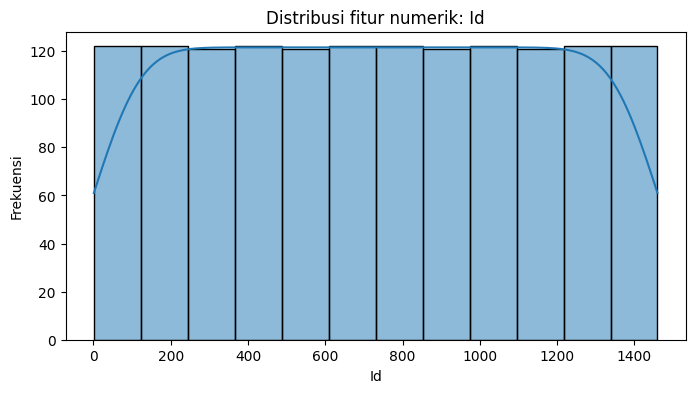

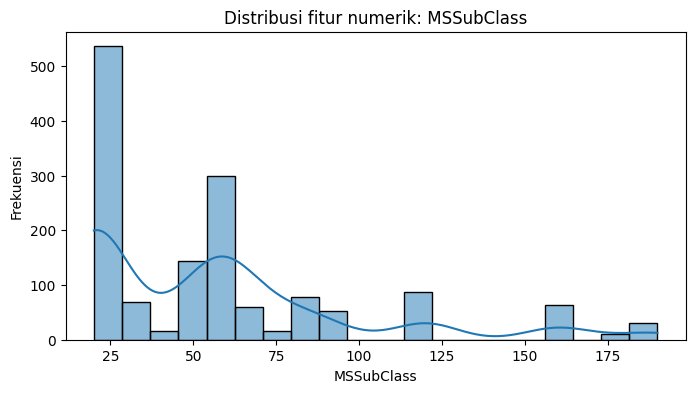

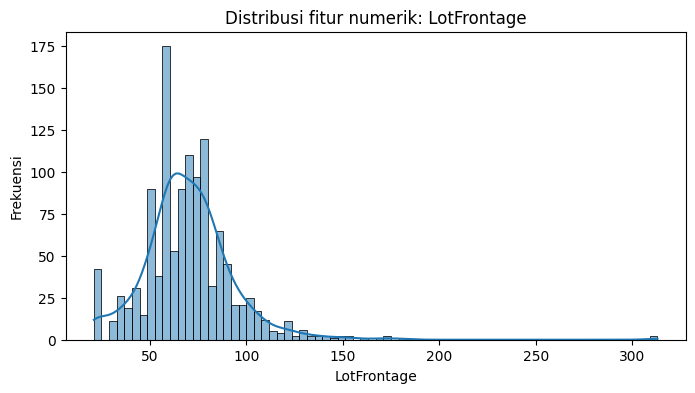

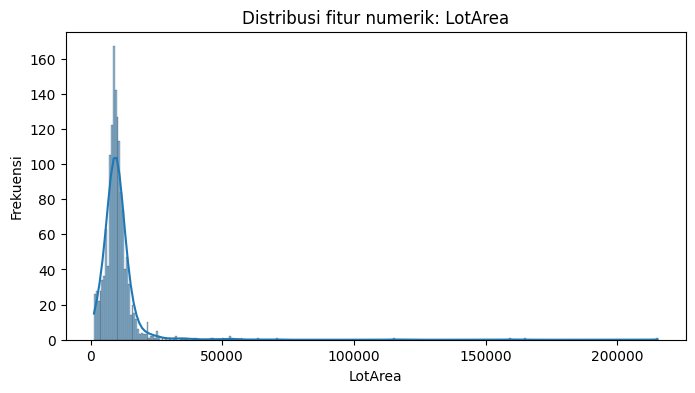

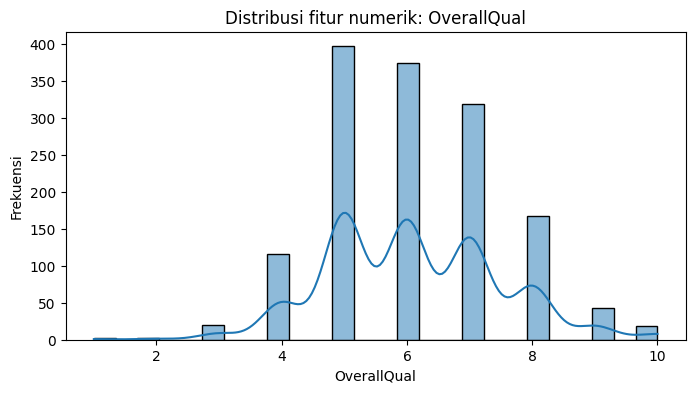

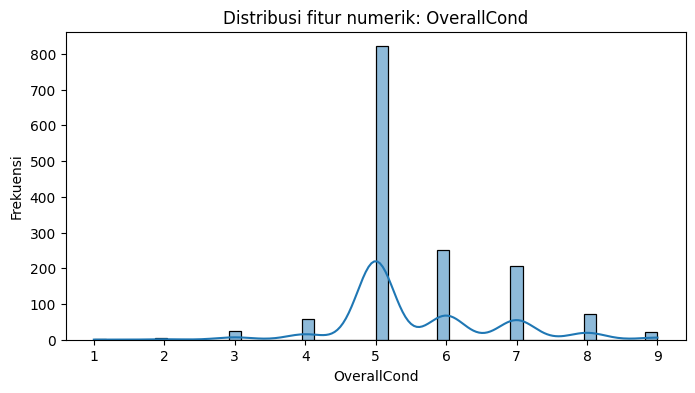

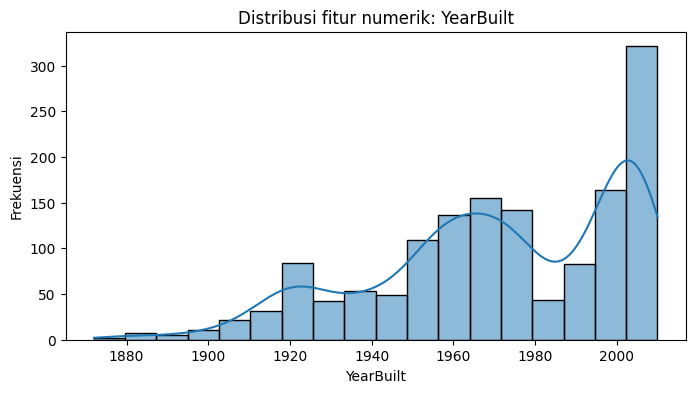

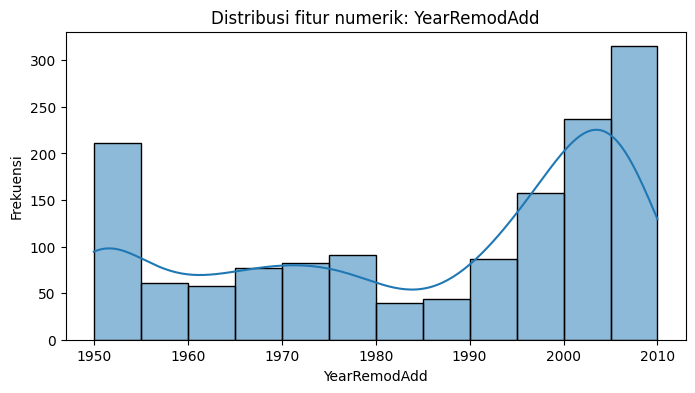

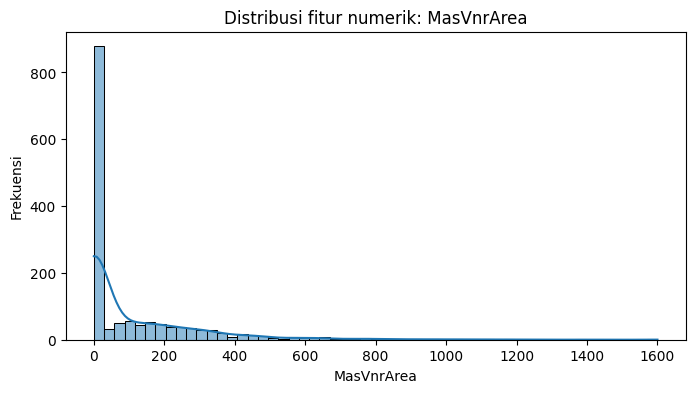

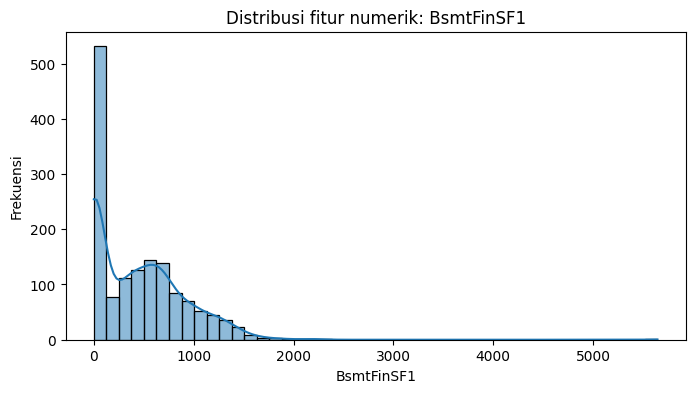

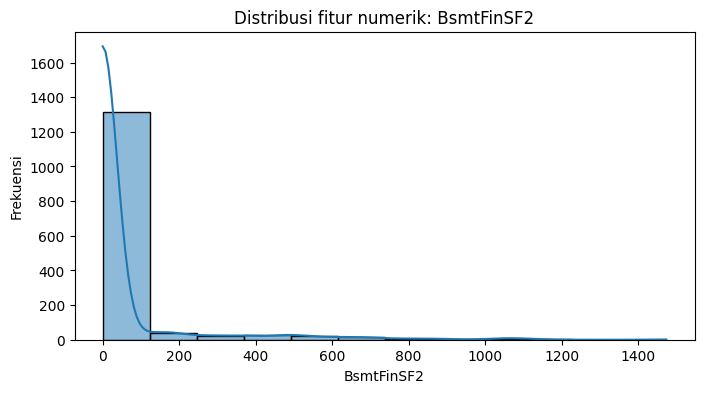

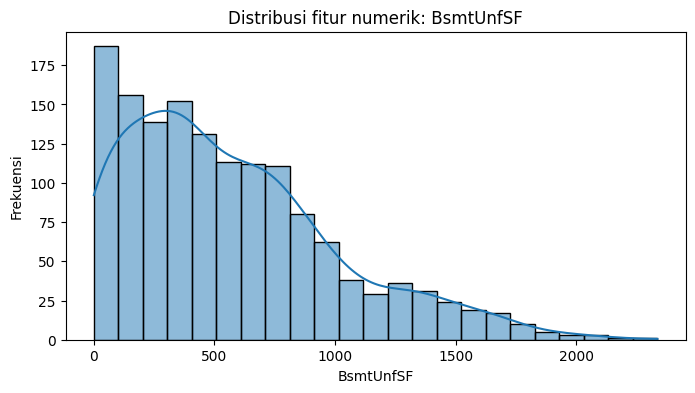

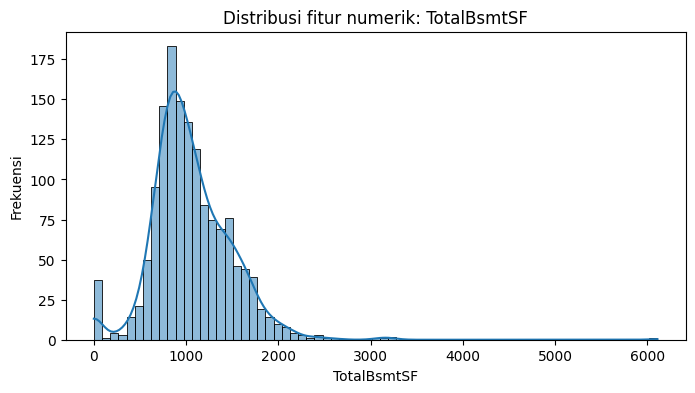

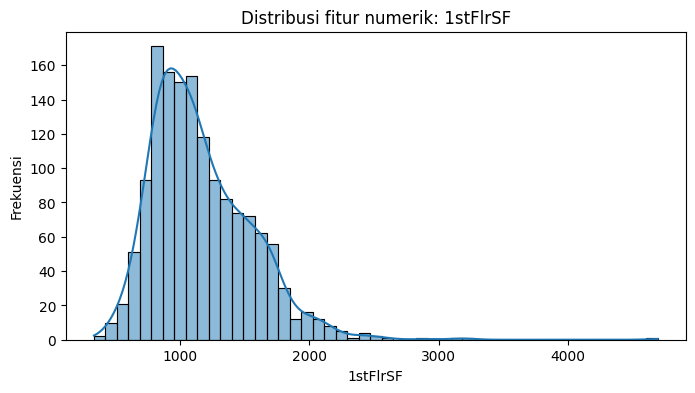

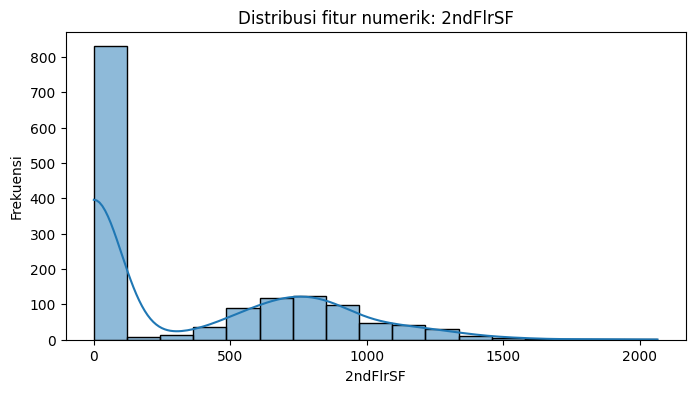

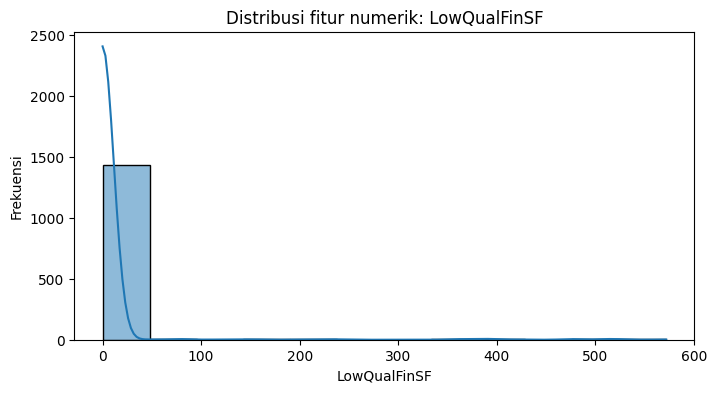

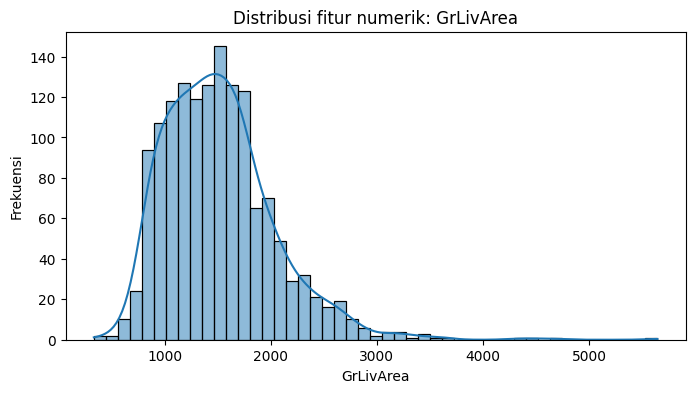

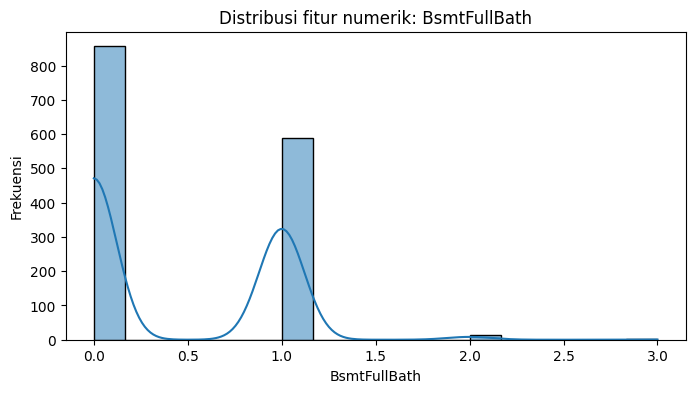

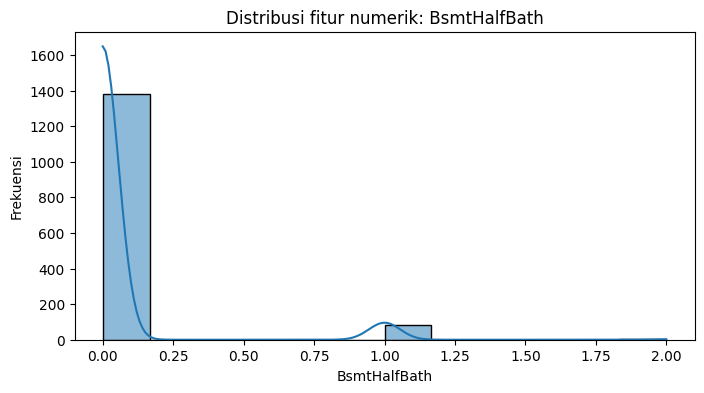

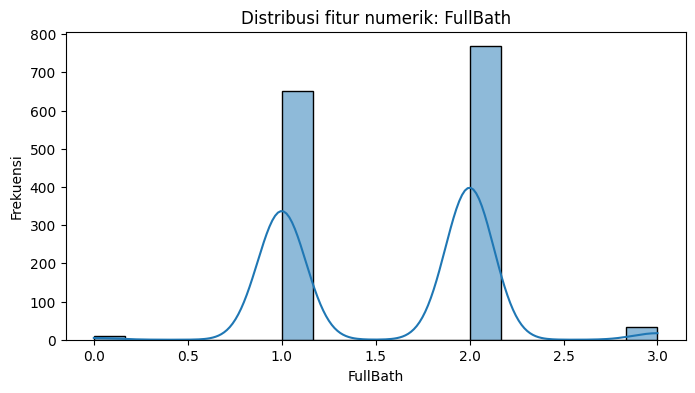

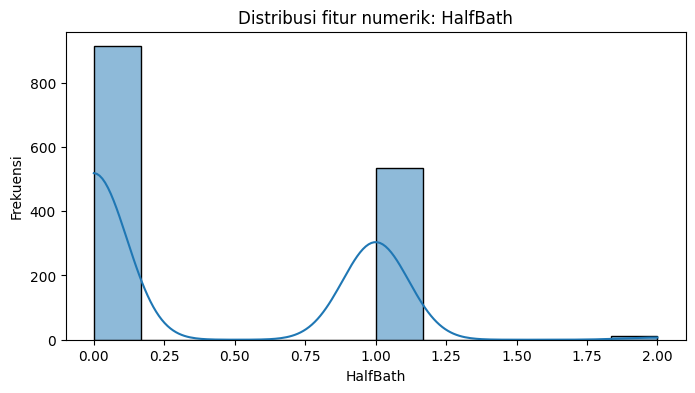

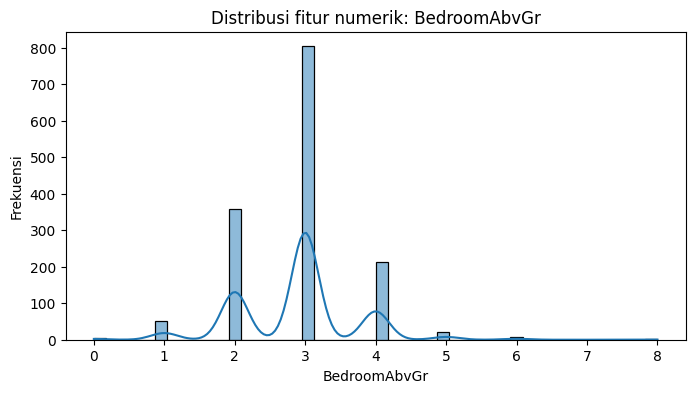

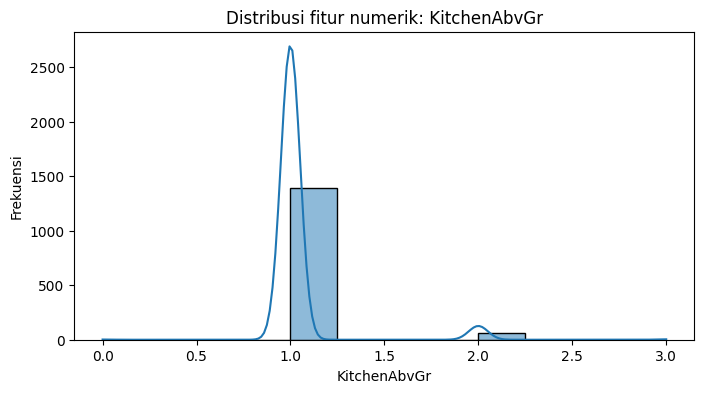

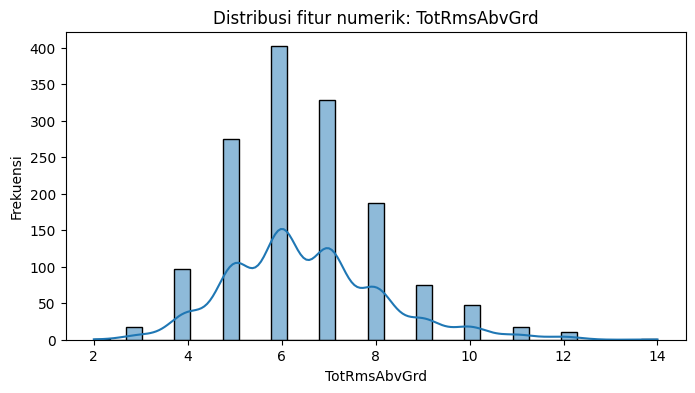

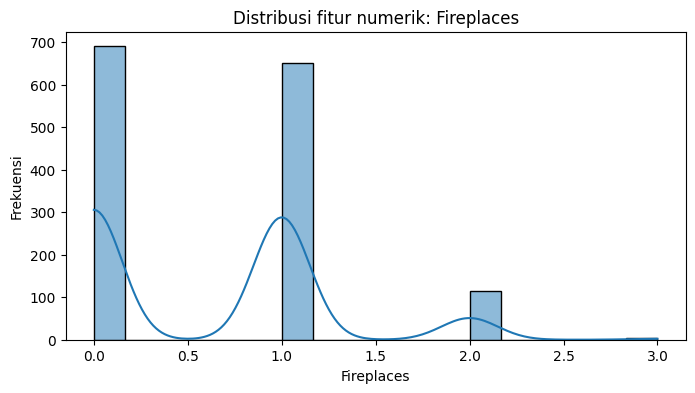

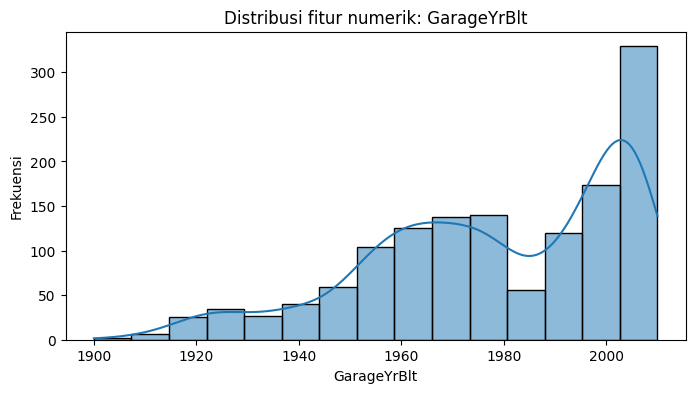

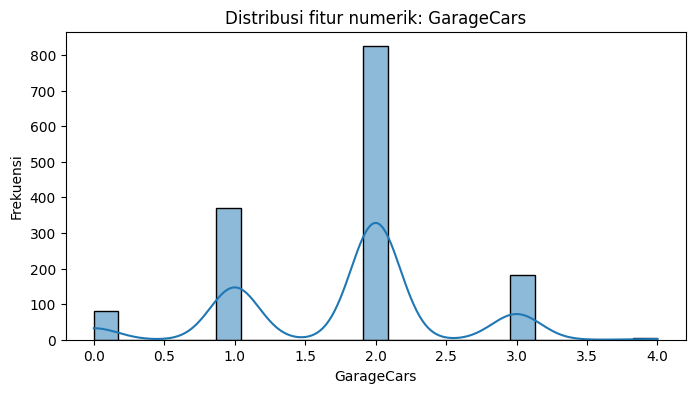

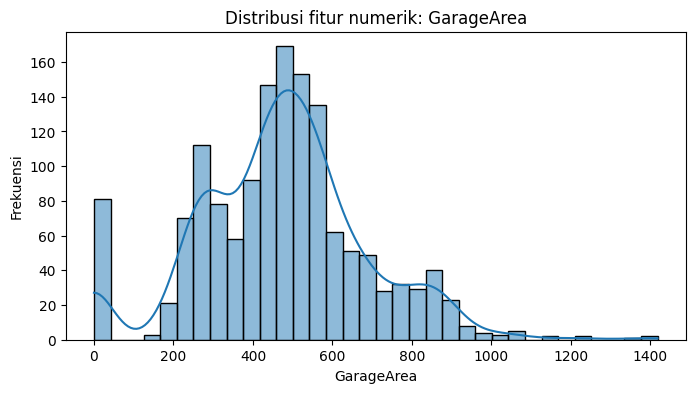

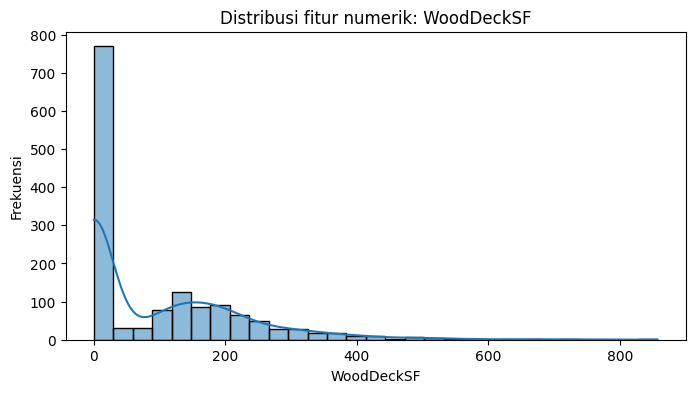

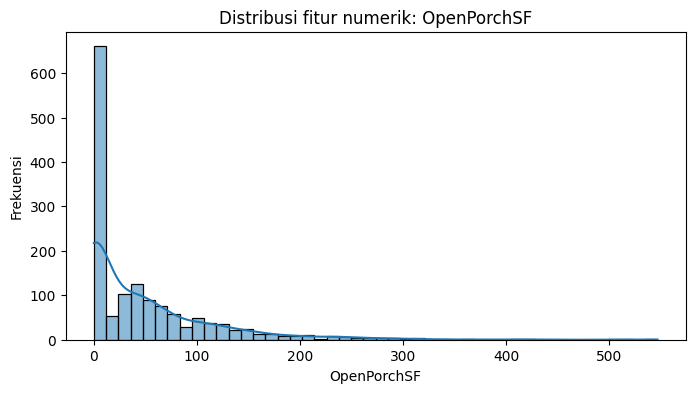

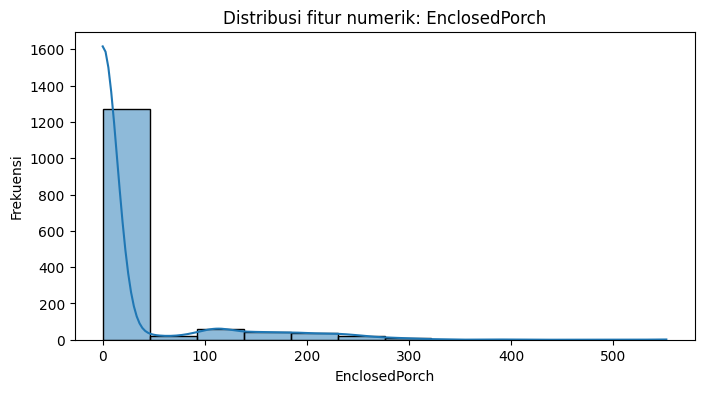

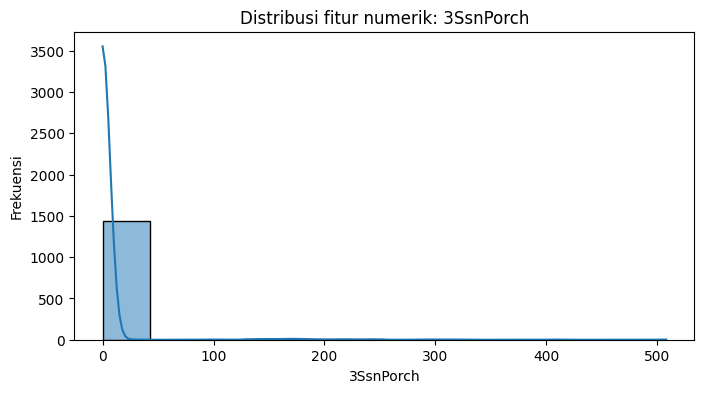

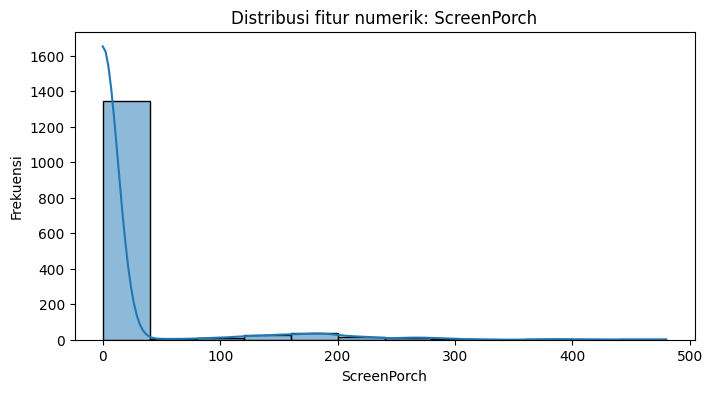

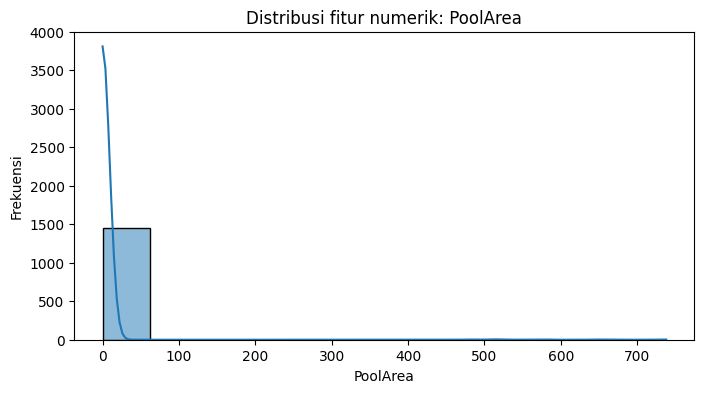

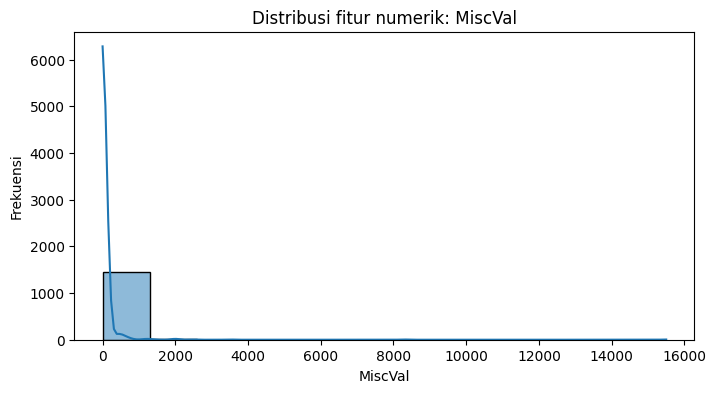

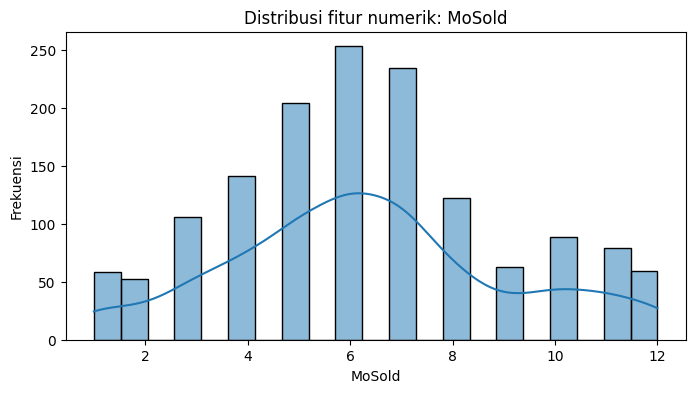

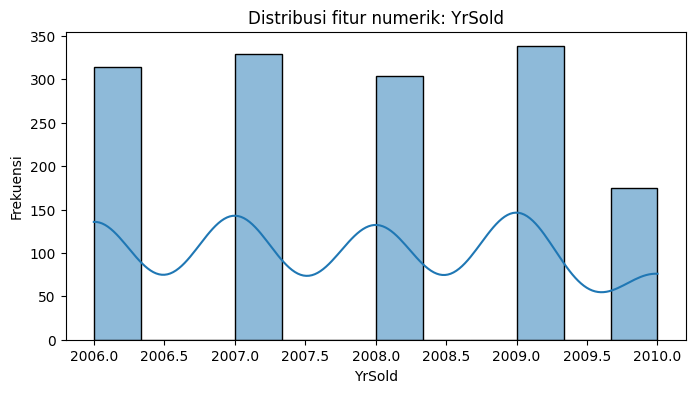

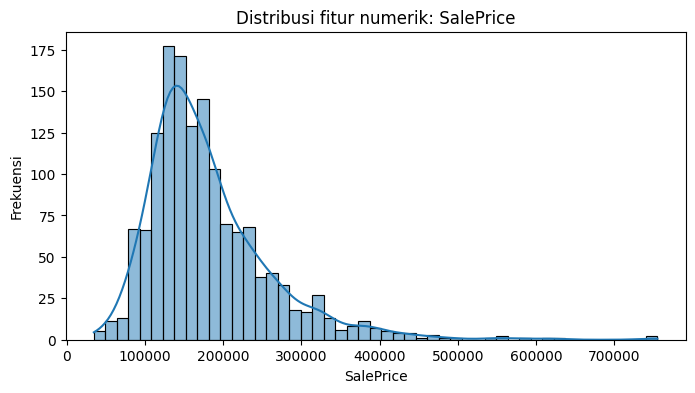

In [17]:
# Visualisasi distribusi fitur numerik
numeric_features = train.select_dtypes(include=['int64', 'float64']).columns

for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[feature], kde=True)
    plt.title(f'Distribusi fitur numerik: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.show()

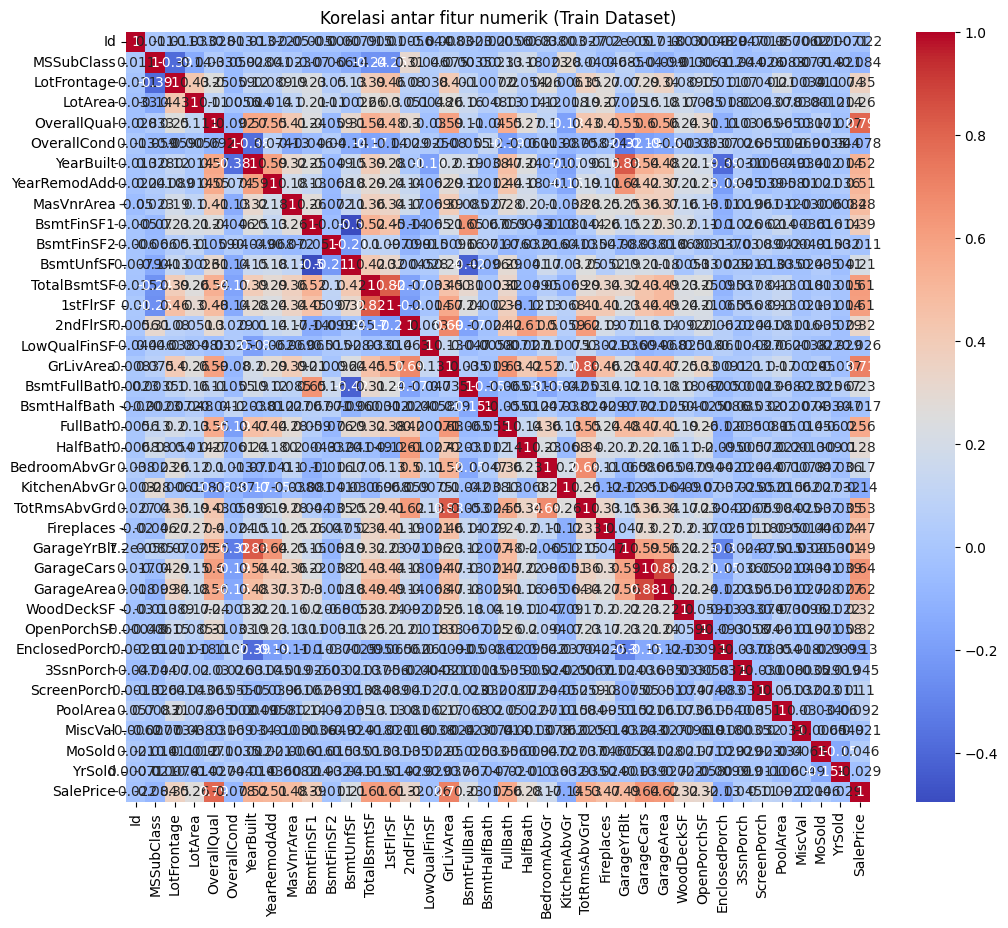

In [19]:
# Hanya ambil fitur numerik
numeric_features = train.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi antar fitur numerik
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur numerik (Train Dataset)')
plt.show()


# Feature Engineering

In [27]:
# Mengecek kembali missing value pada train data
print("Missing Values sebelum penanganan:")
print(train.isnull().sum())

# Mengisi missing values pada fitur numerik
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    median = train[col].median()
    train[col] = train[col].fillna(median)
    if col in test.columns:
        test[col] = test[col].fillna(median)

# Mengisi missing values pada fitur kategorikal
categorical_cols = train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode = train[col].mode()[0]
    train[col] = train[col].fillna(mode)
    if col in test.columns:
        test[col] = test[col].fillna(mode)

print("\nMissing Values setelah penanganan:")
print(train.isnull().sum())


Missing Values sebelum penanganan:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

Missing Values setelah penanganan:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


# Encoding & Feature Scaling

In [28]:
# Tambahkan kolom penanda dataset sebelum penggabungan
train['dataset'] = 'train'
test['dataset'] = 'test'

# Gabungkan kedua dataset untuk memastikan encoding seragam
combined = pd.concat([train, test], ignore_index=True)

# Encoding menggunakan one-hot (hanya kolom kategorikal)
combined_encoded = pd.get_dummies(combined, drop_first=True)

# Pisahkan kembali dataset setelah encoding
train_encoded = combined_encoded[combined_encoded['dataset_train'] == 1].drop(['dataset_train'], axis=1)
test_encoded = combined_encoded[combined_encoded['dataset_train'] == 0].drop(['dataset_train', 'SalePrice'], axis=1, errors='ignore')

print("Data setelah Encoding (train):")
print(train_encoded.head())

print("\nData setelah Encoding (test):")
print(test_encoded.head())


Data setelah Encoding (train):
   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0       706.0  ...           False           False   
1          1976         0.0       978.0  ...           False           False   
2          2002       162.0       486.0  ...           False           False   
3          1970         0.0       216.0  ...           False           False   
4          2000       350.0       655.0  ...           False           False   

   Sale

In [29]:
# Pisahkan fitur dan target pada dataset training
X_train = train_encoded.drop(['SalePrice', 'Id'], axis=1, errors='ignore')  # Id dihapus karena tidak bermakna
y_train = train_encoded['SalePrice']

# Untuk dataset testing
X_test = test_encoded.drop(['Id'], axis=1, errors='ignore')

# Standardisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nContoh hasil scaling (5 baris pertama data training):")
print(X_train_scaled[:5])



Contoh hasil scaling (5 baris pertama data training):
[[ 0.07337496 -0.22087509 -0.20714171 ... -0.11785113  0.4676514
  -0.30599503]
 [-0.87256276  0.46031974 -0.09188637 ... -0.11785113  0.4676514
  -0.30599503]
 [ 0.07337496 -0.08463612  0.07347998 ... -0.11785113  0.4676514
  -0.30599503]
 [ 0.30985939 -0.44794003 -0.09689747 ... -0.11785113 -2.13834494
  -0.30599503]
 [ 0.07337496  0.64197169  0.37514829 ... -0.11785113  0.4676514
  -0.30599503]]


# Training Model & Evaluasi

In [30]:
# Membuat dan melatih model Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada dataset training untuk evaluasi internal
train_predictions = model.predict(X_train_scaled)

# Evaluasi pada training set
mse_train = mean_squared_error(y_train, train_predictions)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, train_predictions)

print("Evaluasi pada Data Training:")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R-squared: {r2_train}")


Evaluasi pada Data Training:
MSE: 428537273.0659647
RMSE: 20701.141830004563
R-squared: 0.9320514288267948


In [31]:
# Prediksi pada dataset test
test_predictions = model.predict(X_test_scaled)

# Menampilkan hasil prediksi
print("\nContoh prediksi untuk 5 data test pertama:")
print(test_predictions[:5])



Contoh prediksi untuk 5 data test pertama:
[113019.5304696  154037.55125657 187003.3115237  201032.25684263
 202167.74602719]


In [32]:
# Evaluasi dengan cross-validation (cv=5)
scores = cross_val_score(model, X_train_scaled, y_train, scoring='r2', cv=5)

print("\nEvaluasi Cross-Validation R-squared:")
print(f"Rata-rata R-squared: {np.mean(scores)}")
print(f"Standar deviasi R-squared: {np.std(scores)}")



Evaluasi Cross-Validation R-squared:
Rata-rata R-squared: 0.6634784574815186
Standar deviasi R-squared: 0.26800102383084173


# Penjelasan Persamaan Matematika

# Penjelasan Matriks Evaluasi pada Model Regresi

### 1. Mean Squared Error (MSE)

MSE mengukur rata-rata dari kuadrat selisih antara nilai aktual dan nilai prediksi:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- \( y_i \): nilai aktual  
- \( \hat{y}_i \): nilai prediksi  
- \( n \): jumlah sampel  

**Interpretasi:**
- MSE mengukur seberapa besar rata-rata kesalahan kuadrat dari prediksi terhadap nilai aktual.
- Nilai MSE yang lebih kecil menandakan bahwa prediksi model lebih mendekati data sebenarnya.
- MSE sensitif terhadap outlier karena kesalahan dikuadratkan.

---

### 2. Root Mean Squared Error (RMSE)

RMSE adalah akar dari MSE untuk mengembalikan satuan ke skala asli:

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

**Interpretasi:**
- RMSE memiliki satuan yang sama dengan target asli (misalnya harga rumah, suhu, dll).
- Semakin kecil RMSE, semakin baik kinerja model.
- Seperti MSE, RMSE juga sensitif terhadap outlier.

---

### 3. Coefficient of Determination (R²)

R² mengukur seberapa baik model menjelaskan variasi dalam data:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

- \( \bar{y} \): rata-rata nilai aktual  

**Interpretasi:**
- R² menunjukkan proporsi variasi target yang bisa dijelaskan oleh model.
- Nilai R² berada dalam rentang 0 hingga 1:
  - R² = 1: prediksi sempurna.
  - R² = 0: model tidak menjelaskan variasi sama sekali.
  - R² < 0: model lebih buruk dari sekadar menggunakan rata-rata target.
- R² digunakan untuk mengukur seberapa baik fitting model terhadap data.